In [1]:
import xarray as xr

In [2]:
ds = xr.tutorial.load_dataset("air_temperature")
ds

<xarray.Dataset>
Dimensions:  (lat: 25, time: 2920, lon: 53)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 241.2 242.5 243.5 ... 296.5 296.2 295.7
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [3]:
def replace_with_cumsum(array):
    flat_array = array.flatten()
    array = 0 * array + flat_array.cumsum().reshape(array.shape)
    return array

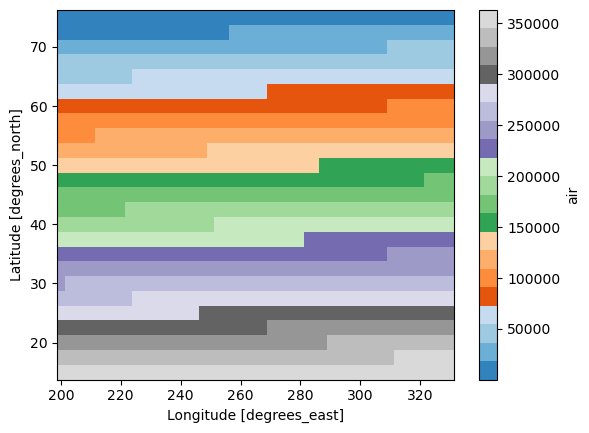

In [8]:
xr.apply_ufunc(
    replace_with_cumsum,
    ds.air.isel(time=0, drop=True)
).plot(cmap="tab20c")

In [10]:
def cumsum_in_time(array):
    return array.cumsum(axis=-1)

In [24]:
air_processed = xr.apply_ufunc(
    cumsum_in_time,
    ds.air - ds.air.mean(),
    input_core_dims=[["time", ], ],  # ensures "time" corresponds to axis=-1
    output_core_dims=[["time", ], ],
)

In [27]:
(air_processed.isel(time=-1) - (ds.air.isel(time=-1) - ds.air.mean())).mean()    

<xarray.DataArray 'air' ()>
array(7.752453, dtype=float32)
Coordinates:
    time     datetime64[ns] 2014-12-31T18:00:00

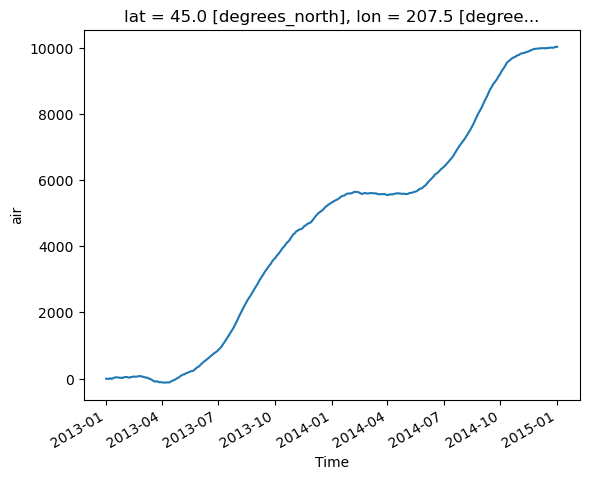

In [28]:
air_processed.isel(lon=3, lat=12).plot()

In [23]:
ds.air.isel(lon=3, lat=12)

<xarray.DataArray 'air' (time: 2920)>
array([279.6    , 280.5    , 280.9    , ..., 280.38998, 280.69   ,
       281.19   ], dtype=float32)
Coordinates:
    lat      float32 45.0
    lon      float32 207.5
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

In [30]:
ds.air.stack(ll=("lon", "lat")).transpose("ll", "time")

<xarray.DataArray 'air' (ll: 1325, time: 2920)>
array([[241.2    , 242.09999, 242.29999, ..., 243.48999, 245.79   ,
        245.09   ],
       [243.79999, 243.59999, 244.59999, ..., 249.09   , 249.89   ,
        249.89   ],
       [250.     , 253.2    , 256.19998, ..., 262.69   , 262.38998,
        262.99   ],
       ...,
       [294.69998, 294.79   , 295.     , ..., 294.69   , 294.29   ,
        294.69   ],
       [295.19998, 295.1    , 295.6    , ..., 294.79   , 294.38998,
        295.19   ],
       [296.6    , 296.6    , 296.79   , ..., 295.79   , 295.19   ,
        295.69   ]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
  * ll       (ll) object MultiIndex
  * lon      (ll) float32 200.0 200.0 200.0 200.0 ... 330.0 330.0 330.0 330.0
  * lat      (ll) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

In [31]:
import numpy as np

In [32]:
np.polyfit?

Signature: np.polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)
Docstring:
Least squares polynomial fit.

.. note::
   This forms part of the old polynomial API. Since version 1.4, the
   new polynomial API defined in `numpy.polynomial` is preferred.
   A summary of the differences can be found in the
   :doc:`transition guide </reference/routines.polynomials>`.

Fit a polynomial ``p(x) = p[0] * x**deg + ... + p[deg]`` of degree `deg`
to points `(x, y)`. Returns a vector of coefficients `p` that minimises
the squared error in the order `deg`, `deg-1`, ... `0`.

The `Polynomial.fit <numpy.polynomial.polynomial.Polynomial.fit>` class
method is recommended for new code as it is more stable numerically. See
the documentation of the method for more information.

Parameters
----------
x : array_like, shape (M,)
    x-coordinates of the M sample points ``(x[i], y[i])``.
y : array_like, shape (M,) or (M, K)
    y-coordinates of the sample points. Several data sets of sample
    poi